In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv("D:/IMU/Health Data Collection HIA322/Project & Assignments/Group Project/cleaned_data.csv")

In [17]:
data.dtypes

date                        object
checkins                     int64
unique_ind                   int64
unique_loc                   int64
0                            int64
                            ...   
cluster_detentionCentre    float64
cluster_workplace          float64
casual_contacts            float64
hide_large                 float64
hide_small                 float64
Length: 85, dtype: object

In [11]:
data.describe()

,checkins,unique_ind,unique_loc,0,1,2,3,4,5,6,...,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace,casual_contacts,hide_large,hide_small
count,5.590000e+02,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,...,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02,559.000000,559.000000
mean,2.109647e+07,8.048036e+06,647925.869410,14063.658318,9087.282648,6310.257603,4644.307692,3717.860465,3266.391771,3126.475850,...,0.531306,15.565295,131.132379,21.980322,66.059034,41.686941,422.776386,8.909831e+04,103.345259,1412.953488
std,8.082974e+06,2.734497e+06,196738.427722,12369.930000,8386.596044,5598.475880,3838.733368,2798.787134,2221.262319,1964.069302,...,3.273988,46.885764,179.933969,29.384022,122.378072,67.974039,490.990333,1.958672e+05,202.279724,2710.837421
min,7.166000e+04,6.466600e+04,29048.000000,262.000000,152.000000,141.000000,82.000000,52.000000,46.000000,53.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.737054e+07,7.026666e+06,576424.000000,4123.000000,2749.500000,2216.000000,1952.000000,1797.000000,1730.500000,1710.500000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,44.000000,6.951500e+03,0.000000,0.000000
50%,2.127704e+07,8.340927e+06,671537.000000,9686.000000,5685.000000,3803.000000,2949.000000,2558.000000,2522.000000,2599.000000,...,0.000000,0.000000,39.000000,11.000000,17.000000,6.000000,174.000000,2.649500e+04,32.000000,585.000000
75%,2.733442e+07,1.003305e+07,787073.500000,20835.500000,13311.500000,9235.500000,6792.500000,5205.000000,4560.500000,4314.000000,...,0.000000,8.000000,208.000000,32.500000,55.500000,62.000000,752.500000,5.835100e+04,97.000000,1329.500000
max,3.454630e+07,1.155520e+07,893008.000000,65947.000000,47818.000000,35083.000000,25690.000000,19095.000000,15260.000000,12744.000000,...,54.000000,359.000000,825.000000,189.000000,920.000000,439.000000,2338.000000,1.100022e+06,1166.000000,14190.000000


In [13]:
print("MySejahtera Checkins Cleaned data format : {}".format(data.shape))

MySejahtera Checkins Cleaned data format : (559, 85)


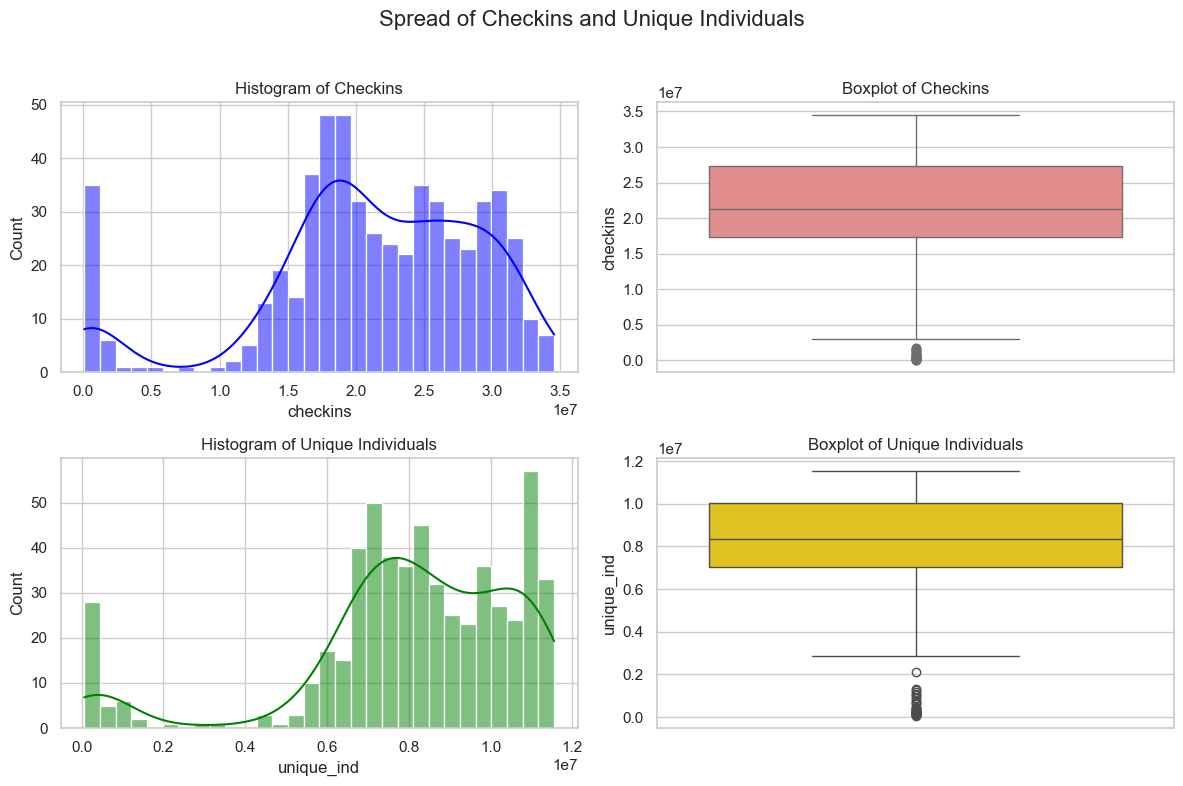

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better aesthetics
sns.set(style="whitegrid")

# Initialize the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Spread of Checkins and Unique Individuals", fontsize=16)

# Histogram for 'checkins'
sns.histplot(data['checkins'], bins=30, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Histogram of Checkins')

# Boxplot for 'checkins'
sns.boxplot(data['checkins'], ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Boxplot of Checkins')

# Histogram for 'unique_ind'
sns.histplot(data['unique_ind'], bins=30, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Histogram of Unique Individuals')

# Boxplot for 'unique_ind'
sns.boxplot(data['unique_ind'], ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Boxplot of Unique Individuals')

# Adjust layout for clarity
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


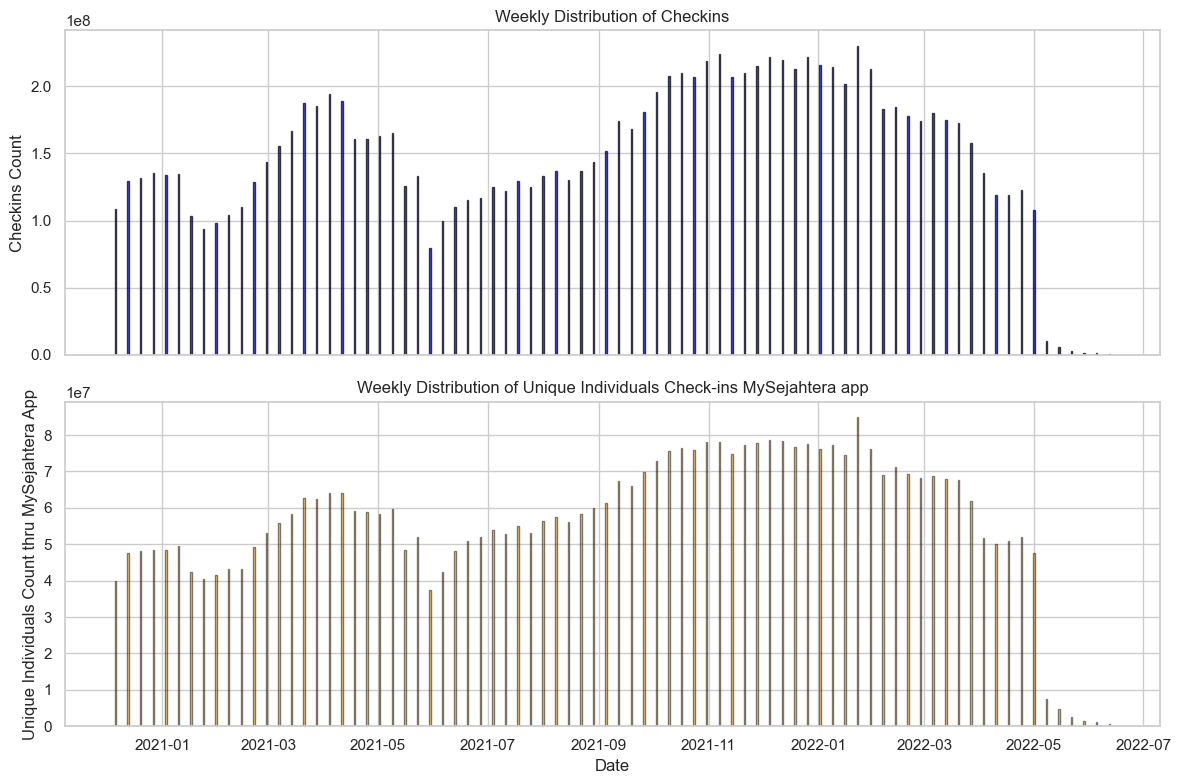

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the date column is in datetime format
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

# Resample data weekly to reduce granularity (adjust to 'D' for daily, 'M' for monthly)
data_resampled = data.resample('W', on='date').sum()

# Plot histograms for checkins and unique individuals over time
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot 1: Checkins
ax[0].bar(data_resampled.index, data_resampled['checkins'], color='blue', alpha=0.7, edgecolor='black')
ax[0].set_title("Weekly Distribution of Checkins")
ax[0].set_ylabel("Checkins Count")

# Plot 2: Unique Individuals
ax[1].bar(data_resampled.index, data_resampled['unique_ind'], color='orange', alpha=0.5, edgecolor='black')
ax[1].set_title("Weekly Distribution of Unique Individuals Check-ins MySejahtera app")
ax[1].set_ylabel("Unique Individuals Count thru MySejahtera App")
ax[1].set_xlabel("Date")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2028\4252563540.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_checkins = data_filtered.resample('M', on='date')['checkins'].sum()


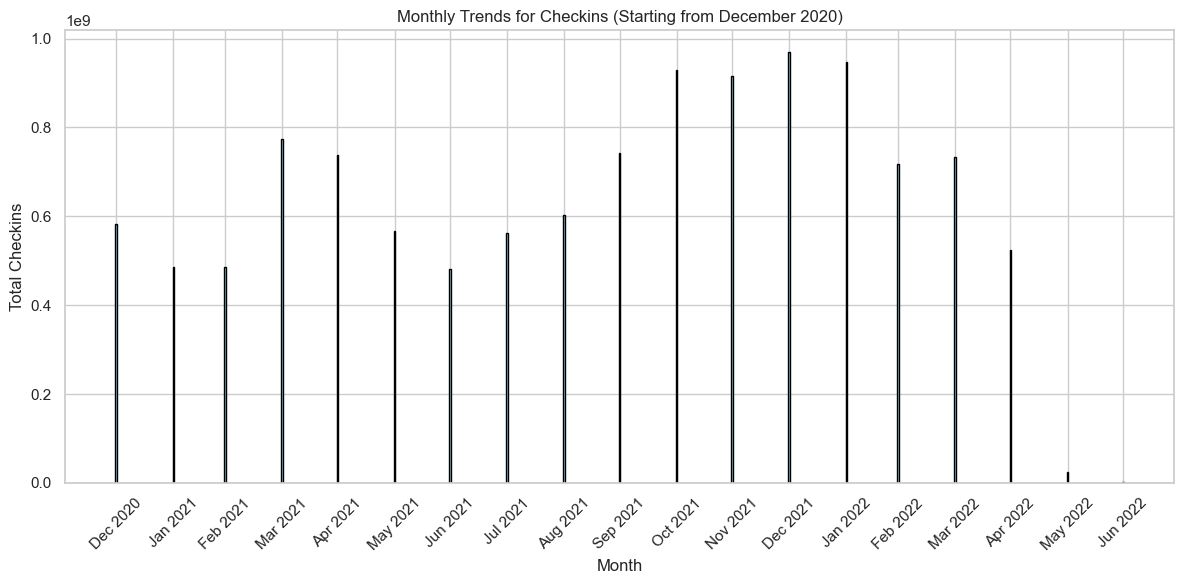

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the date column is in datetime format
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

# Filter data starting from 1st December 2020
data_filtered = data[data['date'] >= '2020-12-01']

# Resample data monthly and sum 'checkins'
monthly_checkins = data_filtered.resample('M', on='date')['checkins'].sum()

# Plot the monthly trend
plt.figure(figsize=(12, 6))
plt.bar(monthly_checkins.index, monthly_checkins.values, color='skyblue', edgecolor='black')
plt.title("Monthly Trends for Checkins (Starting from December 2020)")
plt.xlabel("Month")
plt.ylabel("Total Checkins")
plt.xticks(monthly_checkins.index, monthly_checkins.index.strftime('%b %Y'), rotation=45)
plt.tight_layout()
plt.show()


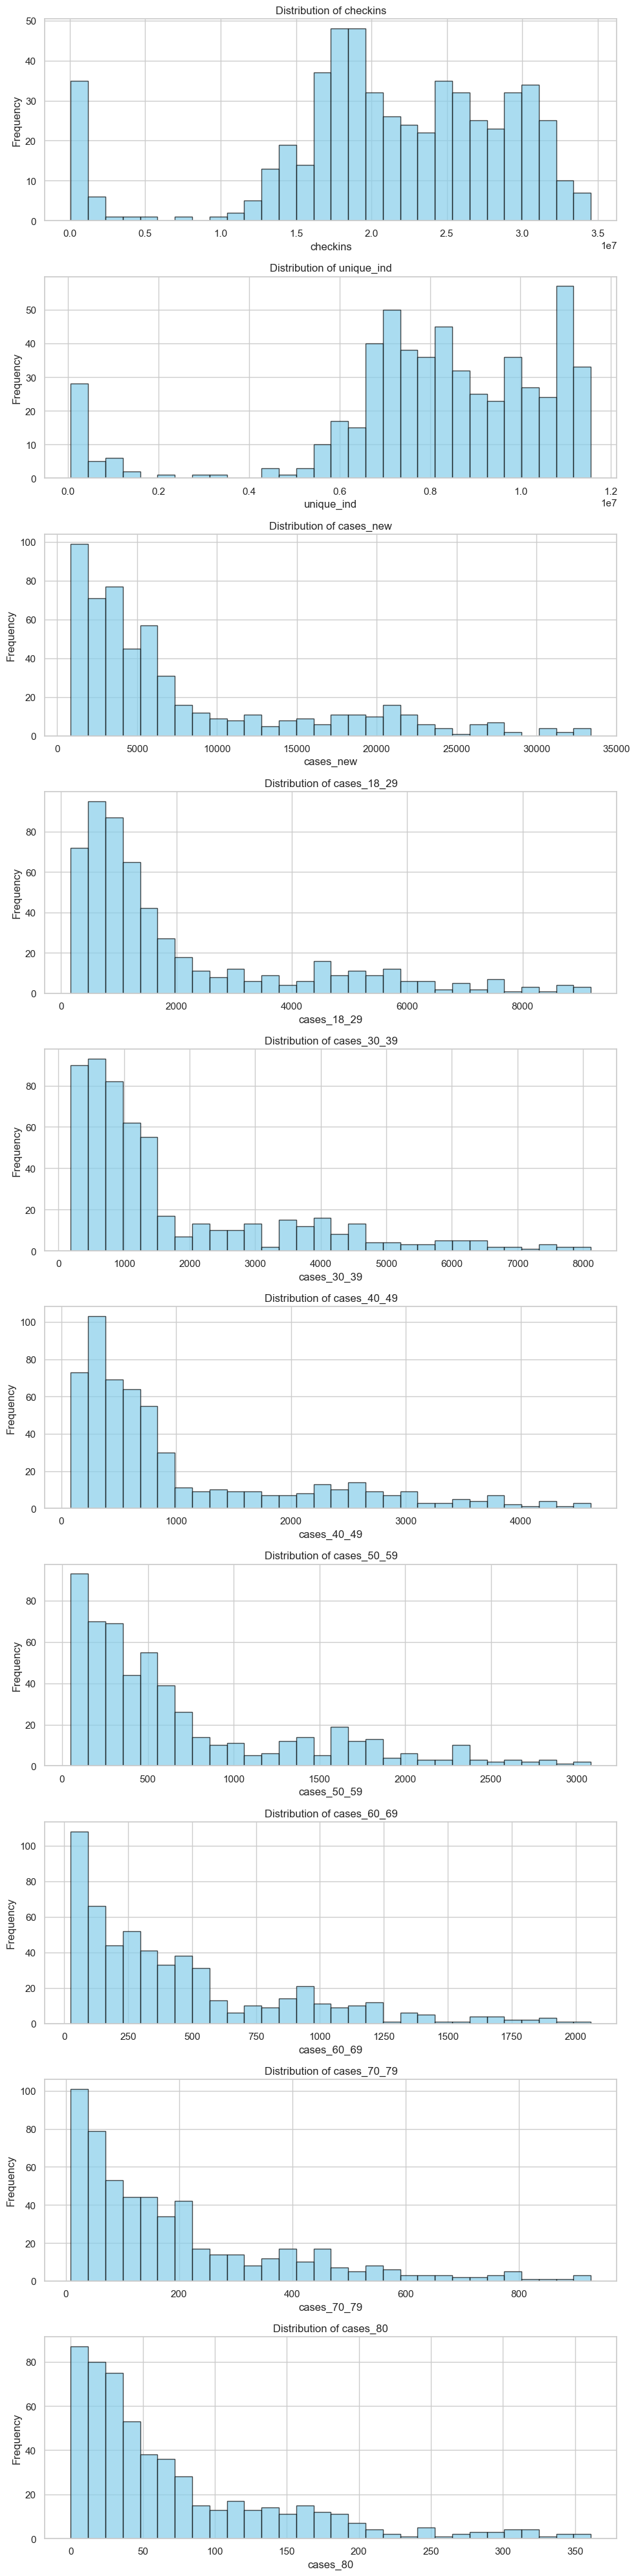

In [39]:
import matplotlib.pyplot as plt

# Define the list of key variables to plot
variables = ['checkins', 'unique_ind', 'cases_new', 'cases_18_29', 'cases_30_39', 
             'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80']

# Set up the plot grid
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 4 * len(variables)))

# Plot histograms for each variable
for i, var in enumerate(variables):
    axes[i].hist(data[var], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()
